In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.set_option("display.max_columns",60)

from IPython.core.pylabtools import figsize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
train_features = pd.read_csv('F:/Dhrumil/r/Tableau/training_features.csv')
test_features = pd.read_csv('F:/Dhrumil/r/Tableau/testing_features.csv')
train_labels = pd.read_csv('F:/Dhrumil/r/Tableau/training_labels.csv')
test_labels = pd.read_csv('F:/Dhrumil/r/Tableau/testing_labels.csv')

print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6322, 65)
Testing Feature Size:   (2710, 65)
Training Labels Size:   (6322, 1)
Testing Labels Size:    (2710, 1)


In [3]:
train_features.head(12)

,Order,Property Id,DOF Gross Floor Area,Year Built,number,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,...,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Borough,Largest Property Use Type
0,8749,2661595,69595.0,1964,1,100,95.4,5.6,NaN,NaN,NaN,40.882731,-73.903729,8.0,287.0,6.049969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bronx,Multifamily Housing
1,10643,4938575,67500.0,1940,1,100,58.9,3.2,0.5,34446.7,32.17,40.645814,-73.962376,14.0,512.0,5.141664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Brooklyn,Multifamily Housing
2,3605,2630626,85952.0,1927,1,100,76.6,13.9,0.0,390.3,40.71,40.757220,-73.979877,5.0,96.0,5.364573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Manhattan,Office
3,335,4994373,370814.0,1970,1,95,24.6,6.5,0.0,8217.0,59.90,40.815052,-73.935936,11.0,210.0,3.775057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Manhattan,Multifamily Housing
4,6599,2795611,117080.0,1938,1,100,72.1,3.8,0.5,77304.6,NaN,40.833607,-73.918558,4.0,18102.0,6.140746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bronx,Multifamily Housing
5,8815,3116754,78825.0,1950,1,100,73.3,3.1,0.1,4782.4,64.43,40.896786,-73.896854,8.0,351.0,5.990714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bronx,Multifamily Housing
6,2015,4949050,183168.0,1896,1,95,83.3,13.7,0.2,32817.6,NaN,40.743415,-73.989094,5.0,58.0,5.667118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Manhattan,Office
7,3661,4403231,58001.0,1970,1,100,46.5,6.8,NaN,NaN,NaN,40.763197,-73.974496,5.0,11201.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0

In [4]:
train_features= train_features.drop(columns=['Borough','Largest Property Use Type'])

In [5]:
train_features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,number,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,...,Largest Property Use Type_Movie Theater,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,8749,2661595,69595.0,1964,1,100,95.4,5.6,NaN,NaN,NaN,40.882731,-73.903729,8.0,287.0,6.049969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10643,4938575,67500.0,1940,1,100,58.9,3.2,0.5,34446.7,32.17,40.645814,-73.962376,14.0,512.0,5.141664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3605,2630626,85952.0,1927,1,100,76.6,13.9,0.0,390.3,40.71,40.757220,-73.979877,5.0,96.0,5.364573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,335,4994373,370814.0,1970,1,95,24.6,6.5,0.0,8217.0,59.90,40.815052,-73.935936,11.0,210.0,3.775057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6599,2795611,117080.0,1938,1,100,72.1,3.8,0.5,77304.6,NaN,40.833607,-73.918558,4.0,18102.0,6.140746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
test_features= test_features.drop(columns=['Borough','Largest Property Use Type'])

In [7]:
test_features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,number,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,...,Largest Property Use Type_Movie Theater,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,3848,1423551,345743.0,1980,1,100,61.1,14.4,NaN,NaN,16.12,40.756651,-73.972264,5.0,100.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13331,5838686,148181.0,1932,1,100,54.4,3.7,0.4,60727.8,32.41,NaN,NaN,NaN,NaN,5.813235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14865,3111579,195678.0,1983,1,100,79.1,NaN,NaN,NaN,55.80,40.581202,-74.162664,2.0,27702.0,5.933835,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8461,4859883,125891.0,1962,1,100,90.7,4.7,0.3,37674.2,50.57,40.858853,-73.868957,11.0,33201.0,6.426327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9903,5848160,54698.0,2008,1,95,58.4,6.6,0.4,22174.9,22.10,40.716762,-73.964742,1.0,555.0,4.637637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
imputer = SimpleImputer(strategy= 'median')
imputer.fit(train_features)
x= imputer.transform(train_features)
x_test = imputer.transform(test_features)

In [9]:
print('Missing values in training features: ', np.sum(np.isnan(x)))
print('Missing values in testing features:  ', np.sum(np.isnan(x_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [10]:
print(np.where(~np.isfinite(x)))
print(np.where(~np.isfinite(x_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x)
x = scaler.transform(x)
x_test = scaler.transform(x_test)

In [14]:
y= np.array(train_labels).reshape((-1, ))
y_test= np.array(test_labels).reshape((-1, ))

In [19]:
def mae(y_test,y_pred):
    return np.mean(abs(y_test-y_pred))

def model_eval(model):
    model.fit(x,y)
    model_pred = model.predict(x_test)
    model_mae = mae(y_test,model_pred)
    return model_mae

In [20]:
lr= LinearRegression()
lr_mae = model_eval(lr)
lr_mae

12.988557015563204

In [21]:
svm = SVR(C=1000, gamma=0.1)
svm_mae = model_eval(svm)

In [22]:
svm_mae

10.49089165674137

In [24]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = model_eval(random_forest)
random_forest_mae

9.623974169741699

In [25]:
gradient_boost = GradientBoostingRegressor(random_state=60)
gradient_boost_mae = model_eval(gradient_boost)

In [26]:
gradient_boost_mae

9.773772232725227

In [27]:
knn = KNeighborsRegressor(n_neighbors= 10)
knn_mae = model_eval(knn)
knn_mae

12.04789667896679

<AxesSubplot:ylabel='model'>

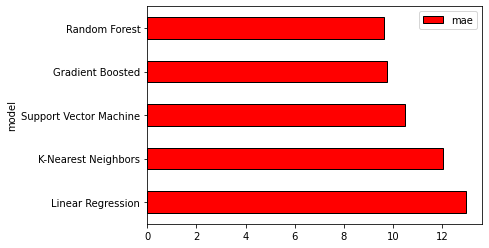

In [29]:
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boost_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')
